Data Analyzing

- How many rows and columns?
- What is the correlation between the variables and the price? (Why might that be?)
- How are variables correlated to each other? (Why?)
- Which variables have the greatest influence on the price?
- Which variables have the least influence on the price?
- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

Quantitative Comparisons

    Price and property characteristics:
        Price vs. LivingArea: Do properties with larger living areas tend to be more expensive?
        Price vs. BedroomCount: How does the number of bedrooms influence the price?
        Price vs. ConstructionYear: Are newer properties more expensive than older ones?

    Surface area and amenities:
        GardenArea vs. LivingArea: Do properties with larger living areas also have bigger gardens?
        SurfaceOfPlot vs. LivingArea: Is there a correlation between the plot size and the living area?

Categorical Comparisons

    Property type and characteristics:
        TypeOfProperty vs. RoomCount: Do different property types (house, apartment, etc.) differ significantly in the number of rooms?
        TypeOfProperty vs. Garden: What proportion of each property type has a garden?

    Location and price:
        Province vs. Price: How do prices vary from one province to another?
        District vs. Price: Are there significant price variations between different districts?

Mixed Comparisons

    Building condition and price:
        StateOfBuilding vs. Price: Are properties in better condition more expensive?
        StateOfBuilding vs. ConstructionYear: Are older buildings generally in worse condition?

    Amenities and location:
        SwimmingPool vs. Region: Are swimming pools more common in certain regions?
        Fireplace vs. Province: Do some provinces have a higher proportion of properties with fireplaces?

Other Interesting Comparisons

    Monthly charges and property characteristics:
        MonthlyCharges vs. LivingArea: Do properties with larger living areas have higher monthly charges?
        MonthlyCharges vs. RoomCount: How does the number of rooms affect monthly charges?

    Interior amenities and condition:
        Furnished vs. StateOfBuilding: Are furnished properties generally in better condition?

These comparisons can help you discover trends, relationships, and valuable insights for analyzing your data.

Pour une analyse d'une base de données pour une agence immobilière avec les colonnes que vous avez mentionnées, différents graphiques peuvent être réalisés avec Matplotlib pour visualiser et mieux comprendre les données. Voici quelques suggestions de graphiques pertinents :

    Histogrammes :
        Distribution des prix (Price).
        Distribution des surfaces habitables (LivingArea).
        Distribution des années de construction (ConstructionYear).
        Distribution des charges mensuelles (MonthlyCharges).

    Diagrammes en barres :
        Nombre de propriétés par pays (Country), province (Province), région (Region), ou localité (Locality).
        Nombre de propriétés avec certaines caractéristiques comme la piscine (SwimmingPool), la cheminée (Fireplace), ou le jardin (Garden).

    Boxplots :
        Prix (Price) par nombre de chambres (BedroomCount).
        Prix (Price) par état du bâtiment (StateOfBuilding).
        Prix (Price) par type de propriété (TypeOfProperty).

    Scatter plots (nuages de points) :
        Prix (Price) en fonction de la surface habitable (LivingArea).
        Prix (Price) en fonction de la surface du terrain (SurfaceOfPlot).
        Prix (Price) en fonction de l'année de construction (ConstructionYear).

    Heatmaps :
        Corrélation entre différentes variables numériques (ex : Price, LivingArea, BedroomCount, BathroomCount, GardenArea, etc.).

    Pie charts (diagrammes en secteurs) :
        Proportion des types de propriété (TypeOfProperty).
        Proportion des types de vente (TypeOfSale).

    Violin plots :
        Distribution des prix (Price) par type de propriété (TypeOfProperty).
        Distribution des prix (Price) par nombre de chambres (BedroomCount).

    Geographical plots :
        Répartition géographique des propriétés sur une carte en fonction de la localité (Locality), le code postal (PostalCode), la région (Region), ou la province 

Import libraries and establish df for sales

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_sales = pd.read_csv('df_sales.csv')

df_sales.describe()



,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
count,91537.000000,91537.000000,91537.000000,91537.0,91537.000000,91537.0,91537.000000,91537.000000,91537.0,91537.000000,91537.000000,9.153700e+04,9.153700e+04,91537.000000,91537.000000,9.153700e+04,91537.000000,91537.0,91537.000000,91537.000000
mean,1.199548,2.786709,1993.226520,1.0,0.018255,1.0,233.077258,160.920874,30.0,2.926609,5299.884396,4.378934e+05,1.227387e+07,6.296558,0.264964,2.124714e+03,0.019664,1.0,1.344047,1.524127
std,0.859880,1.848522,31.840912,0.0,0.133873,0.0,1296.700856,1220.914312,0.0,0.686020,3057.985407,4.452857e+05,2.955621e+06,2.996367,0.759025,3.809708e+05,0.138844,0.0,1.053881,0.499420
min,0.000000,0.000000,1753.000000,1.0,0.000000,1.0,1.000000,12.000000,30.0,1.000000,1000.000000,2.500000e+03,1.882546e+06,1.000000,0.000000,1.000000e+00,0.000000,1.0,0.000000,1.000000
25%,1.000000,2.000000,1984.000000,1.0,0.000000,1.0,140.000000,93.000000,30.0,2.000000,2360.000000,2.529000e+05,1.111197e+07,6.000000,0.000000,3.530000e+02,0.000000,1.0,1.000000,1.000000
50%,1.000000,3.000000,2000.000000,1.0,0.000000,1.0,140.000000,124.000000,30.0,3.000000,4840.000000,3.400000e+05,1.136128e+07,6.000000,0.000000,3.530000e+02,0.000000,1.0,1.000000,2.000000
75%,1.000000,3.000000,2018.000000,1.0,0.000000,1.0,140.000000,177.000000,30.0,3.000000,8450.000000,4.650000e+05,1.146023e+07,6.000000,0.000000,4.620000e+02,0.000000,1.0,2.000000,2.000000
max,58.000000,200.000000,2033.000000,1.0,1.000000,1.0,150000.000000,355500.000000,30.0,4.000000,9992.000000,1.500000e+07,2.002586e+07,68.000000,58.000000,1.152500e+08,1.000000,1.0,58.000000,2.000000


In [4]:
df_sales.columns


Index(['Url', 'BathroomCount', 'BedroomCount', 'ConstructionYear', 'Country',
       'District', 'Fireplace', 'FloodingZone', 'Furnished', 'Garden',
       'GardenArea', 'Kitchen', 'LivingArea', 'Locality', 'MonthlyCharges',
       'NumberOfFacades', 'PEB', 'PostalCode', 'Price', 'PropertyId',
       'Province', 'Region', 'RoomCount', 'ShowerCount', 'StateOfBuilding',
       'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool', 'Terrace',
       'ToiletCount', 'TypeOfProperty', 'TypeOfSale'],
      dtype='object')

Lets show mean and median for rent and sales 

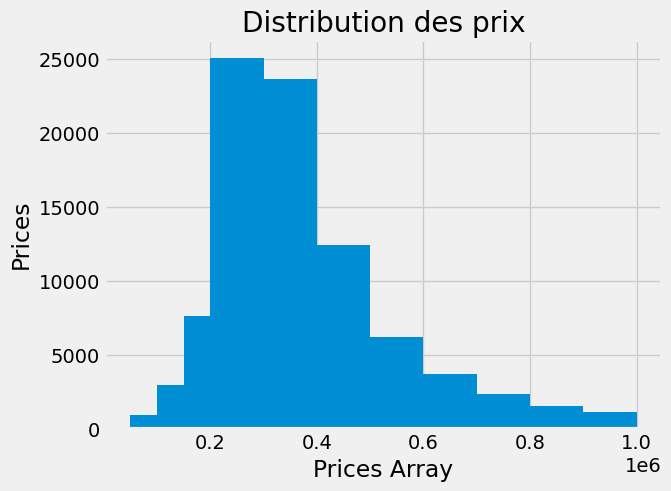

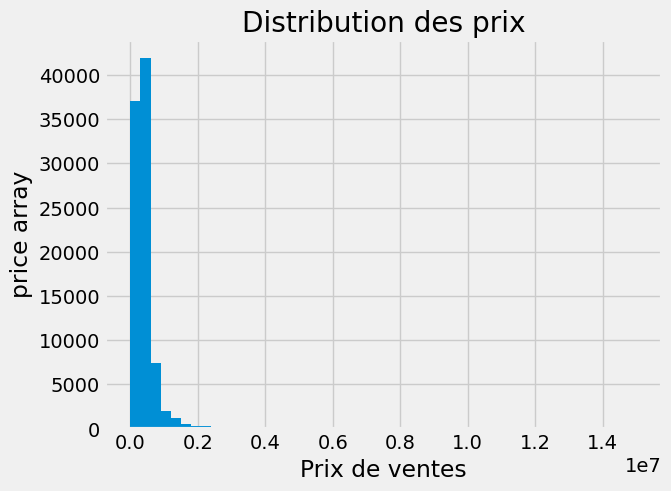

In [38]:
df_sales = pd.read_csv('df_sales.csv')
df_rent = pd.read_csv('df_rent.csv')

plt.style.use('fivethirtyeight')

price_sales = df_sales.Price
#price_rent = df_rent.Price

bins = [50000, 100000 , 150000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

plt.hist(price_sales, bins=bins)
plt.title('Distribution des prix')
plt.xlabel('Prices Array')
plt.ylabel('Prices')

plt.show()

import matplotlib.pyplot as plt

df_sales['Price'].hist(bins=50)
plt.title('Distribution des prix')
plt.xlabel('Prix de ventes')
plt.ylabel('price array')
plt.show()




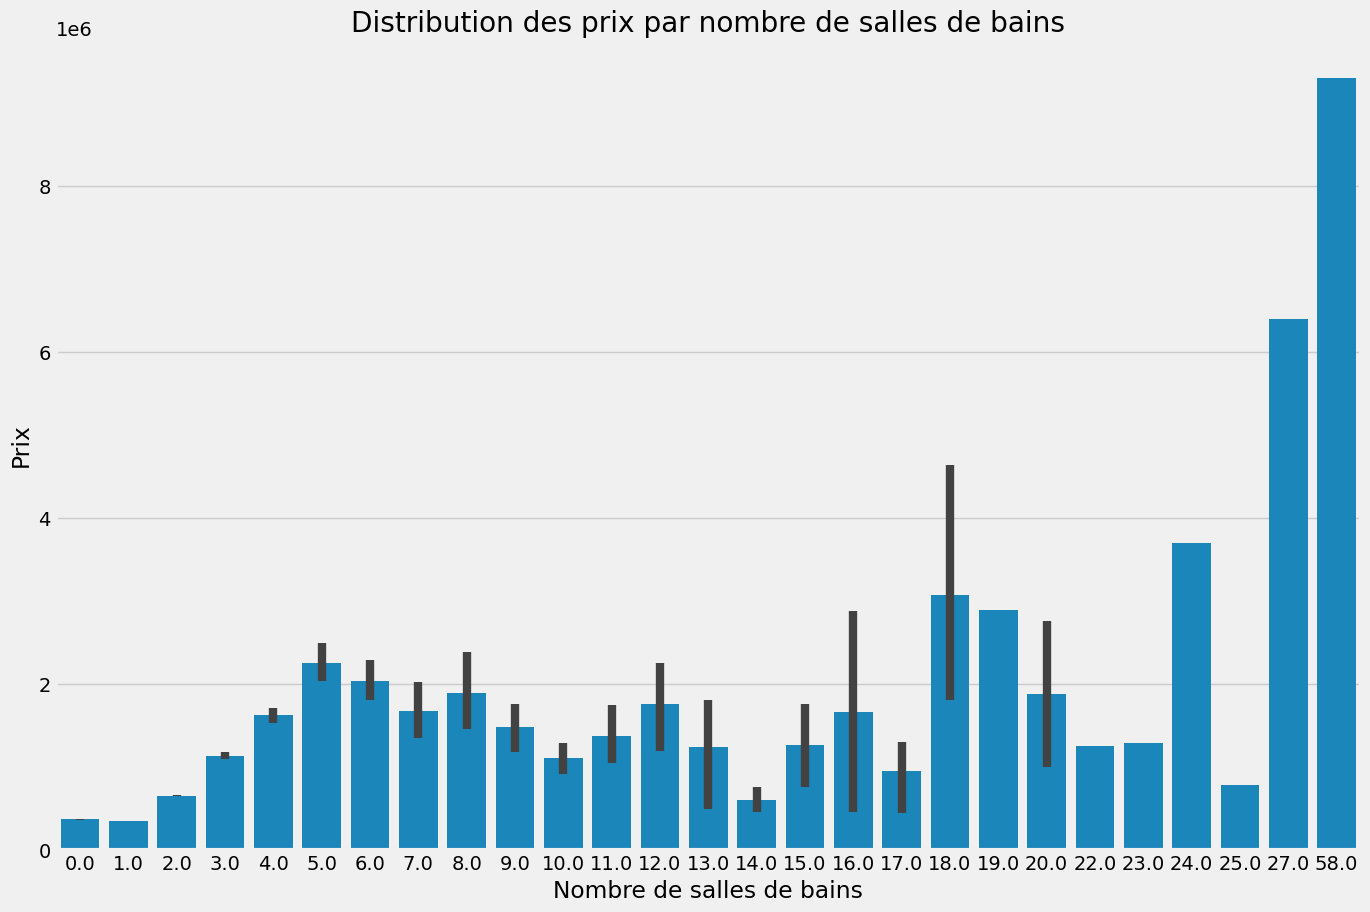

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous d'avoir importé vos données dans un DataFrame nommé `df`

plt.figure(figsize=(15, 10))
sns.barplot(x='BathroomCount', y='Price', data=df_sales)
plt.title('Distribution des prix par nombre de salles de bains')
plt.xlabel('Nombre de salles de bains')
plt.ylabel('Prix')
plt.show()